In [1]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

import transformers
from transformers import T5ForConditionalGeneration, T5Tokenizer

pd.set_option("display.max_colwidth", 200)

/home/anton/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-04-02 19:19:28.482562: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-02 19:19:29.217719: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-02 19:19:29.217749: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your m

In [2]:
imdb = pd.read_csv("IMDB Dataset.csv")
imdb.head(10)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me...",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire p...",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue i...",positive
3,Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenl...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what mone...",positive
5,"Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it's not preachy or boring. It just never gets old, despite my having seen it some 15 o...",positive
6,I sure would like to see a resurrection of a up dated Seahunt series with the tech they have today it would bring back the kid excitement in me.I grew up on black and white TV and Seahunt with Gun...,positive
7,"This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off after that. By 1990, the show was not really funny ...",negative
8,Encouraged by the positive comments about this film on here I was looking forward to watching this film. Bad mistake. I've seen 950+ films and this is truly one of the worst of them - it's awful i...,negative
9,"If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br />Great Camp!!!",positive


In [3]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [4]:
imdb["review"] = np.vectorize(remove_pattern)(imdb["review"], "<[\w]*") 
imdb["review"] = imdb["review"].str.replace("[^a-zA-Z#]", " ")

imdb.head(10)

/tmp/ipykernel_53444/218700270.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  imdb["review"] = imdb["review"].str.replace("[^a-zA-Z#]", " ")


,review,sentiment
0,One of the other reviewers has mentioned that after watching just Oz episode you ll be hooked They are right as this is exactly what happened with me The first thing that struck me about...,positive
1,A wonderful little production The filming technique is very unassuming very old time BBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece ...,positive
2,I thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a light hearted comedy The plot is simplistic but the dialogue i...,positive
3,Basically there s a family where a little boy Jake thinks there s a zombie in his closet his parents are fighting all the time This movie is slower than a soap opera and suddenly Jak...,negative
4,Petter Mattei s Love in the Time of Money is a visually stunning film to watch Mr Mattei offers us a vivid portrait about human relations This is a movie that seems to be telling us what mone...,positive
5,Probably my all time favorite movie a story of selflessness sacrifice and dedication to a noble cause but it s not preachy or boring It just never gets old despite my having seen it some o...,positive
6,I sure would like to see a resurrection of a up dated Seahunt series with the tech they have today it would bring back the kid excitement in me I grew up on black and white TV and Seahunt with Gun...,positive
7,This show was an amazing fresh innovative idea in the s when it first aired The first or years were brilliant but things dropped off after that By the show was not really funny ...,negative
8,Encouraged by the positive comments about this film on here I was looking forward to watching this film Bad mistake I ve seen films and this is truly one of the worst of them it s awful i...,negative
9,If you like original gut wrenching laughter you will like this movie If you are young or old then you will love this movie hell even my mom liked it Great Camp,positive


In [5]:
positive_reviews = imdb[imdb["sentiment"] == "positive"][:1000]
negative_reviews = imdb[imdb["sentiment"] == "negative"][:1000]

positive_reviews.reset_index(inplace=True, drop=True)
negative_reviews.reset_index(inplace=True, drop=True)

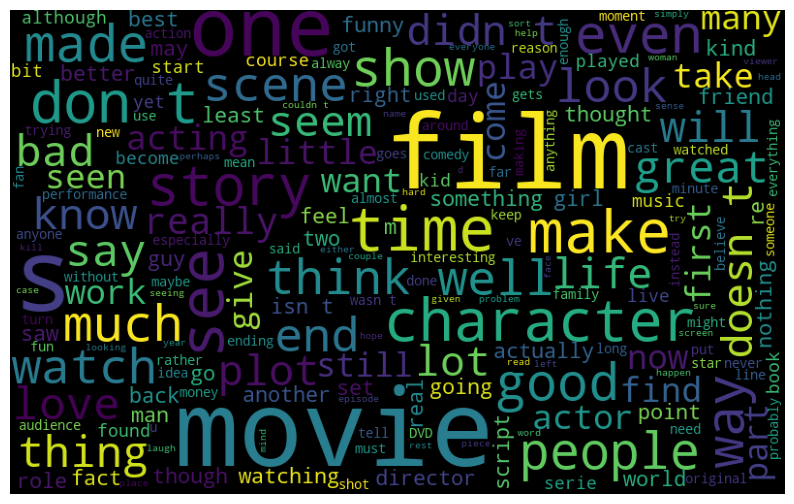

In [6]:
words = ' '.join([text for text in imdb["review"]]) 

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud) 
plt.axis('off')
plt.show()

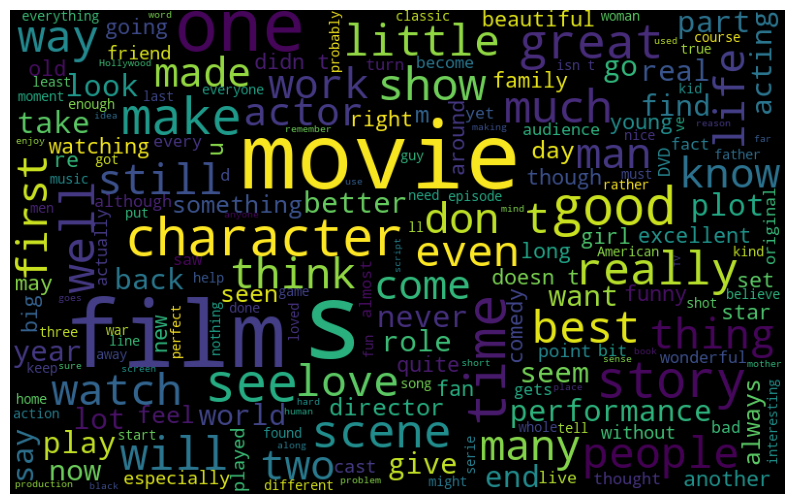

In [7]:
words = ' '.join([text for text in positive_reviews["review"]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud) 
plt.axis('off')
plt.show()

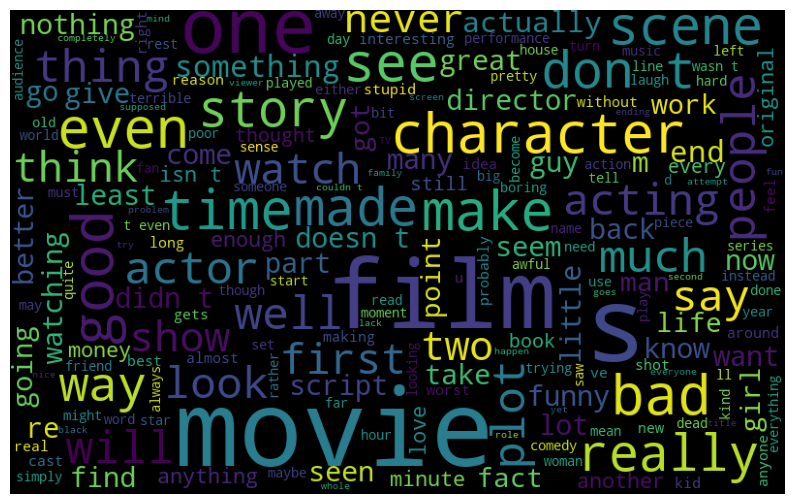

In [8]:
words = ' '.join([text for text in negative_reviews["review"]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud) 
plt.axis('off')
plt.show()

In [9]:
def summarize(dataframe, model_max_length):
    # Load the T5 model and tokenizer
    model = T5ForConditionalGeneration.from_pretrained('t5-small')
    tokenizer = T5Tokenizer.from_pretrained('t5-small', model_max_length=model_max_length)

    for i in range(dataframe.shape[0]):
        text = dataframe["review"][i]
        # Define the input text and the summary length
        max_length = int(0.05*len(text))

        # Preprocess the text and encode it as input for the model
        input_text = "summarize: " + text
        input_ids = tokenizer.encode(input_text, return_tensors='pt').to("cpu")

        # Generate a summary
        summary = model.generate(input_ids, max_length=max_length)

        # Decode the summary
        summary_text = tokenizer.decode(summary[0], skip_special_tokens=True)
        dataframe.loc[i, "summary"] = summary_text

    return dataframe

In [10]:
positive_reviews_summary = summarize(positive_reviews[:5], model_max_length=5000)
positive_reviews_summary

/tmp/ipykernel_53444/2122876765.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[i, "summary"] = summary_text


,review,sentiment,summary
0,One of the other reviewers has mentioned that after watching just Oz episode you ll be hooked They are right as this is exactly what happened with me The first thing that struck me about...,positive,the first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This sho...
1,A wonderful little production The filming technique is very unassuming very old time BBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece ...,positive,the filming technique is very old time fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece. the realism really comes home with the little things the fan...
2,I thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a light hearted comedy The plot is simplistic but the dialogue i...,positive,the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer. this was the most I d laughed at one of Woody s comedies
3,Petter Mattei s Love in the Time of Money is a visually stunning film to watch Mr Mattei offers us a vivid portrait about human relations This is a movie that seems to be telling us what mone...,positive,petter Mattei s love in the time of money is a visually stunning film to watch. the film is a variation on the Arthur Schnitzler s play about the same theme. the director transfers the action to t...
4,Probably my all time favorite movie a story of selflessness sacrifice and dedication to a noble cause but it s not preachy or boring It just never gets old despite my having seen it some o...,positive,a story of selflessness sacrifice and dedication to a noble cause is my all time favorite movie a story of selflessness sacrifice and dedication to


In [11]:
# rouge example

from rouge import Rouge 

reference = "The cat is on the mat."
hypothesis = "The cat and the dog."

rouge = Rouge()
scores = rouge.get_scores(hypothesis, reference)

# https://medium.com/nlplanet/two-minutes-nlp-learn-the-rouge-metric-by-examples-f179cc285499
scores_df = pd.DataFrame.from_dict(scores[0])
scores_df

,rouge-1,rouge-2,rouge-l
r,0.500000,0.200000,0.500000
p,0.600000,0.250000,0.600000
f,0.545455,0.222222,0.545455


In [12]:
from rouge import Rouge 

rouge = Rouge()
for i in range(positive_reviews_summary.shape[0]):
    scores = rouge.get_scores(positive_reviews_summary["summary"][i], positive_reviews_summary["review"][i])

    scores_df = pd.DataFrame.from_dict(scores[0])
    print("\n", scores_df)


     rouge-1   rouge-2   rouge-l
r  0.285714  0.197324  0.280612
p  1.000000  0.907692  0.982143
f  0.444444  0.324176  0.436508

     rouge-1   rouge-2   rouge-l
r  0.270270  0.212903  0.270270
p  1.000000  0.891892  1.000000
f  0.425532  0.343750  0.425532

     rouge-1   rouge-2   rouge-l
r  0.243697  0.189024  0.243697
p  1.000000  0.939394  1.000000
f  0.391892  0.314721  0.391892

     rouge-1   rouge-2   rouge-l
r  0.226027  0.165094  0.219178
p  0.891892  0.744681  0.864865
f  0.360656  0.270270  0.349727

     rouge-1   rouge-2   rouge-l
r  0.168421  0.123967  0.136842
p  1.000000  0.882353  0.812500
f  0.288288  0.217391  0.234234


In [13]:
imdb = imdb.drop(["sentiment"], axis=1)
imdb.head(10)

,review
0,One of the other reviewers has mentioned that after watching just Oz episode you ll be hooked They are right as this is exactly what happened with me The first thing that struck me about...
1,A wonderful little production The filming technique is very unassuming very old time BBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece ...
2,I thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a light hearted comedy The plot is simplistic but the dialogue i...
3,Basically there s a family where a little boy Jake thinks there s a zombie in his closet his parents are fighting all the time This movie is slower than a soap opera and suddenly Jak...
4,Petter Mattei s Love in the Time of Money is a visually stunning film to watch Mr Mattei offers us a vivid portrait about human relations This is a movie that seems to be telling us what mone...
5,Probably my all time favorite movie a story of selflessness sacrifice and dedication to a noble cause but it s not preachy or boring It just never gets old despite my having seen it some o...
6,I sure would like to see a resurrection of a up dated Seahunt series with the tech they have today it would bring back the kid excitement in me I grew up on black and white TV and Seahunt with Gun...
7,This show was an amazing fresh innovative idea in the s when it first aired The first or years were brilliant but things dropped off after that By the show was not really funny ...
8,Encouraged by the positive comments about this film on here I was looking forward to watching this film Bad mistake I ve seen films and this is truly one of the worst of them it s awful i...
9,If you like original gut wrenching laughter you will like this movie If you are young or old then you will love this movie hell even my mom liked it Great Camp


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

In [15]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words="english")
tfidf = tfidf_vectorizer.fit_transform(imdb["review"])

# words = tfidf_vectorizer.get_feature_names_out()
# features = [" ".join(words[np.flatnonzero(row)]) for row in tfidf.todense()]

print(pd.DataFrame({"review": [text for text in imdb["review"]], "review_feature": tfidf}))

                                                                                                                                                                                                        review  \
0      One of the other reviewers has mentioned that after watching just   Oz episode you ll be hooked  They are right  as this is exactly what happened with me       The first thing that struck me about...   
1      A wonderful little production        The filming technique is very unassuming  very old time BBC fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  ...   
2      I thought this was a wonderful way to spend time on a too hot summer weekend  sitting in the air conditioned theater and watching a light hearted comedy  The plot is simplistic  but the dialogue i...   
3      Basically there s a family where a little boy  Jake  thinks there s a zombie in his closet   his parents are fighting all the time       This movie is sl

In [16]:
print(tfidf[0])

  (0, 890)	0.11428912496387302
  (0, 935)	0.10395742632500175
  (0, 281)	0.09570807372040087
  (0, 834)	0.10926218961593344
  (0, 475)	0.09681512487302016
  (0, 905)	0.09873316996230987
  (0, 139)	0.10285540949021907
  (0, 557)	0.09896833129999487
  (0, 609)	0.09904726371895124
  (0, 463)	0.09539184107314762
  (0, 373)	0.07121543500255861
  (0, 952)	0.0799115503447757
  (0, 170)	0.08825422607735842
  (0, 734)	0.07281874115354184
  (0, 554)	0.10807370108504684
  (0, 228)	0.06690784092070345
  (0, 723)	0.10782000271763777
  (0, 46)	0.11586588005994473
  (0, 666)	0.07165981862308671
  (0, 338)	0.31336139417934195
  (0, 984)	0.09624901669524165
  (0, 777)	0.08063100698141025
  (0, 368)	0.07887074565321998
  (0, 287)	0.07152636905162593
  (0, 525)	0.0806544109450157
  :	:
  (0, 198)	0.08613780405350129
  (0, 409)	0.08596695777688076
  (0, 402)	0.16344227352489268
  (0, 286)	0.08807484808788517
  (0, 668)	0.36511542333012065
  (0, 138)	0.19694941900485455
  (0, 824)	0.11191385773413666
  (0,

In [17]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(imdb["review"])

# words = tfidf_vectorizer.get_feature_names_out()
# features = [" ".join(words[np.flatnonzero(row)]) for row in tfidf.todense()]

print(pd.DataFrame({"review": [text for text in imdb["review"]], "review_feature": bow}))

                                                                                                                                                                                                        review  \
0      One of the other reviewers has mentioned that after watching just   Oz episode you ll be hooked  They are right  as this is exactly what happened with me       The first thing that struck me about...   
1      A wonderful little production        The filming technique is very unassuming  very old time BBC fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  ...   
2      I thought this was a wonderful way to spend time on a too hot summer weekend  sitting in the air conditioned theater and watching a light hearted comedy  The plot is simplistic  but the dialogue i...   
3      Basically there s a family where a little boy  Jake  thinks there s a zombie in his closet   his parents are fighting all the time       This movie is sl

In [18]:
print(bow[0])

  (0, 553)	1
  (0, 953)	2
  (0, 458)	2
  (0, 265)	2
  (0, 510)	3
  (0, 717)	2
  (0, 274)	1
  (0, 387)	1
  (0, 873)	1
  (0, 740)	1
  (0, 937)	4
  (0, 762)	1
  (0, 974)	2
  (0, 765)	1
  (0, 140)	1
  (0, 918)	1
  (0, 103)	1
  (0, 363)	1
  (0, 824)	1
  (0, 138)	2
  (0, 668)	3
  (0, 286)	1
  (0, 402)	2
  (0, 409)	1
  (0, 198)	1
  :	:
  (0, 525)	1
  (0, 287)	1
  (0, 368)	1
  (0, 777)	1
  (0, 984)	1
  (0, 338)	3
  (0, 666)	1
  (0, 46)	1
  (0, 723)	1
  (0, 228)	1
  (0, 554)	1
  (0, 734)	1
  (0, 170)	1
  (0, 952)	1
  (0, 373)	1
  (0, 463)	1
  (0, 609)	1
  (0, 557)	1
  (0, 139)	1
  (0, 905)	1
  (0, 475)	1
  (0, 834)	1
  (0, 281)	1
  (0, 935)	1
  (0, 890)	1


In [78]:
tokenized_review = imdb["review"][:1000].apply(lambda x: x.split()) 

model_w2v = gensim.models.Word2Vec(
    tokenized_review,
    alpha = 0.01,
    vector_size=400,  # desired no. of features/independent variables
    window=10,         # context window size
    min_count=2,      # ignores all words with total frequency lower than 2.                                  
    sg = 1,           # 1 for skip-gram model
    hs = 0,
    negative = 10,    # for negative sampling
    workers= 32,      # № of cores
    seed = 34
) 

model_w2v.train(tokenized_review, total_examples=len(imdb["review"][:10000]), epochs=100)

(16983300, 23412500)

In [81]:
model_w2v.wv.most_similar(positive="sex")

[('spade', 0.39918553829193115),
 ('photographers', 0.3985474109649658),
 ('Nope', 0.38407638669013977),
 ('counted', 0.37939321994781494),
 ('porno', 0.3707645833492279),
 ('phoned', 0.3686339259147644),
 ('Soderbergh', 0.3660936653614044),
 ('Gaira', 0.3563108742237091),
 ('injustice', 0.3545072376728058),
 ('decapitation', 0.350492388010025)]

In [79]:
cs1 = model_w2v.wv.similarity(w1="love",w2="lovers") # 1
cs2 = model_w2v.wv.similarity(w1="always",w2="never") # -1
cs3 = model_w2v.wv.similarity(w1="detective",w2="fridge") # 0

print(round(cs1,2), round(cs2,2), round(cs3,2), sep="\n")
print("MSE  =", round(np.square(np.subtract([1,-1,0],[cs1,cs2,cs3])).mean(),2))

0.17
0.12
0.06
MSE  = 0.65


In [66]:
import sys
all_sims = model_w2v.wv.most_similar("fridge", topn=sys.maxsize)
last_10 = list(reversed(all_sims[-10:]))
print(last_10)

[('Of', 0.17369963228702545), ('no', 0.17421060800552368), ('No', 0.18434487283229828), ('A', 0.19400884211063385), ('any', 0.1962023377418518), ('into', 0.19685816764831543), ('from', 0.21137721836566925), ('Tom', 0.21273595094680786), ('Frank', 0.2149236649274826), ('which', 0.2196415215730667)]


In [21]:
model_w2v.wv["love"]

array([-0.4754037 ,  0.40702707, -0.1220277 ,  0.12991218, -0.11776396,
        0.3622581 , -0.08019368, -0.23950268,  0.47248602, -0.6093954 ,
        0.03275983, -0.0436747 , -0.19425622, -0.15304396,  0.30835694,
        0.19200212, -0.90749085,  0.15820377, -0.592859  , -0.17965259,
       -0.44945964,  0.28114557,  0.01617277,  0.1000382 , -0.30444506,
       -0.670574  ,  0.02825934,  0.34635004,  0.48314035,  0.3122039 ,
       -0.51446533, -0.3225346 ,  0.19082274,  0.03874248,  0.21366122,
        0.05638446, -0.24209902,  0.33688843,  0.68995523, -0.57741207,
       -0.15881424, -0.5482396 , -0.11382007,  0.07940479,  0.58658963,
       -0.07238682, -0.11552663, -0.33136305,  0.07182254,  0.08415947,
        0.19645235, -0.38059092,  0.21840583,  0.02139679,  0.2359072 ,
        0.53711593,  0.05066942, -0.24590772,  0.643546  ,  0.2149211 ,
       -0.18595773, -0.35020897, -0.14765227, -0.75048137, -0.16969074,
       -0.65739274,  0.1802651 , -0.11404135, -0.7857755 , -0.06

In [22]:
from tqdm import tqdm 
from gensim.models.doc2vec import TaggedDocument

tqdm.pandas(desc="progress-bar")

In [23]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["review_" + str(i)]))
    return output

In [24]:
labeled_review = add_label(tokenized_review)

model_d2v = gensim.models.Doc2Vec(
    dm=1,                    # dm = 1 for ‘distributed memory’ model
    dm_mean=1,               # dm_mean = 1 for using mean of the context word vectors
    vector_size=200,         # no. of desired features
    window=5,                # width of the context window                                  
    negative=7,              # if > 0 then negative sampling will be used
    min_count=5,             # ignores all words with total frequency < 5                                  
    workers=32,              # no. of cores                                  
    alpha=0.1,               # learning rate                                  
    seed = 23,               # for reproducibility
)

model_d2v.build_vocab([i for i in tqdm(labeled_review)])
model_d2v.train(labeled_review, total_examples = len(imdb["review"]), epochs=20)

100%|██████████| 1000/1000 [00:00<00:00, 1567378.18it/s]


In [25]:
model_w2v.wv.most_similar(positive="love")

[('ahehehe', 0.4302506446838379),
 ('Dom', 0.4228613078594208),
 ('DeLuise', 0.4208643138408661),
 ('Foxx', 0.42073142528533936),
 ('anticipation', 0.4178408086299896),
 ('renewed', 0.41147923469543457),
 ('gotta', 0.4054068922996521),
 ('scheming', 0.3990554213523865),
 ('lovers', 0.3953828811645508),
 ('MOH', 0.3952310085296631)]